# From Data to Insights: Unraveling Amsterdam Apartment Prices

**Author:** Katarzyna Moscipan  
**Date:** 2024-10-15  

---
## Table of Contents
1. Overview
2. Objective
3. Methodology
4. Data Collection
5. Data Cleaning and Initial Processing
6. Exploratory Data Analysis (EDA)
7. Feature Exploration and Model Preparation
8. Model Building Using OLS Regression
9. Model Evaluation
10. Insights and Future Considerations
 

  
  
---

## 1. Overview
This project analyzes the key factors influencing apartment prices in Amsterdam for September 2024 using data scraped from the Funda website. The analysis identifies size and neighborhood pricing as the primary determinants, with secondary factors like energy efficiency and the number of rooms also playing a role. The findings highlight the complexity of apartment pricing and demonstrate the potential of data-driven approaches for market insights.


---

## 2. Objective
The objective of this project is to identify the main factors that drive apartment prices in Amsterdam. Through Ordinary Least Squares (OLS) regression, the project aims to determine the key predictors of price variation and develop a model to estimate apartment prices.


---

## 3. Methodology
- **Data Collection:** The dataset was scraped from the Funda website for Amsterdam apartments listed in September 2024.  
- **Data Cleaning:** Outliers were removed to focus on typical market conditions.  
- **Model Building:** An OLS regression model was used to assess the relationship between apartment prices and factors like size, location, and energy efficiency.  
- **Model Evaluation:** Model performance was evaluated using R-squared, indicating its explanatory power and predictive capability.


---

## 4. Data Collection
Data for this project was collected using the web scraping tool available at [webscraper.io](https://webscraper.io/), which is a popular platform for extracting data from websites. The primary source of the data is the Funda website, the leading platform in the Netherlands for buying and renting homes.

A total of **1,801** apartments were scraped from the Funda website for the month of September 2024. This dataset provides a comprehensive view of the apartment market in Amsterdam and will be used for subsequent analyses to identify key drivers influencing apartment prices.


---

## 5. Data Cleaning and Initial Processing


#### Import Libaries

In [8]:
# Data Manipulation and Exploration
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis and Outlier Detection
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Preprocessing and Feature Selection
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.feature_selection import SelectKBest, f_regression

# Modeling and Machine Learning
from sklearn.linear_model import LinearRegression

# Model Evaluation and Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

#### Data Inspection

In [10]:
df = pd.read_csv("C:\\Users\\kmosc\\Downloads\\AMS_Apts_2024-09V2.csv")

In [11]:
df

,web-scraper-order,web-scraper-start-url,link,link-href,Address,Price,Size_m2,Post_Code,Number_of_Rooms,Year_Built,Number_of_Bathrooms,Energy_Label,Floor_Level,Neighborhood_Avg_Ask_Price_per_m2,Neighborhood,Ownership_Status
0,1727969685-47,https://www.funda.nl/zoeken/koop?selected_area...,1e Kekerstraat 27\n \n ...,https://www.funda.nl/detail/koop/amsterdam/app...,1e Kekerstraat 27,€ 435.000 k.k.,93 m²,1104 VA Amsterdam,4,2007.0,1.0,A,2e woonlaag,NaN,K-buurt-Zuidwest,NaN
1,1727969208-130,https://www.funda.nl/zoeken/koop?selected_area...,Aaf Bouberstraat 64\n \n ...,https://www.funda.nl/detail/koop/amsterdam/app...,Aaf Bouberstraat 64,€ 400.000 k.k.,71 m²,1065 LT Amsterdam,3,1984.0,1.0,B,2e woonlaag,€ 5.411,Louis Crispijnbuurt,Eeuwigdurend afgekocht
2,1727968229-195,https://www.funda.nl/zoeken/koop?selected_area...,Aalbersestraat 226\n \n ...,https://www.funda.nl/detail/koop/amsterdam/app...,Aalbersestraat 226,€ 275.000 k.k.,42 m²,1067 GM Amsterdam,2,1956.0,1.0,C,2e woonlaag,€ 4.816,Dudokbuurt,Erfpacht
3,1727971114-107,https://www.funda.nl/zoeken/koop?selected_area...,Aalsmeerplein 2-2\n \n ...,https://www.funda.nl/detail/koop/amsterdam/app...,Aalsmeerplein 2-2,€ 475.000 k.k.,57 m²,1059 AS Amsterdam,3,1933.0,1.0,C,2e woonlaag,€ 8.146,Aalsmeerwegbuurt-Oost,Volle eigendom
4,1727969688-48,https://www.funda.nl/zoeken/koop?selected_area...,Aalsmeerweg 52-2\n \n ...,https://www.funda.nl/detail/koop/amsterdam/app...,Aalsmeerweg 52-2,€ 450.000 k.k.,52 m²,1059 AL Amsterdam,3,1929.0,1.0,D,3e woonlaag,€ 8.380,Aalsmeerwegbuurt-West,Volle eigendom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796,1727972823-105,https://www.funda.nl/zoeken/koop?selected_area...,Zuid-Hollandstraat 18-1\n \n ...,https://www.funda.nl/detail/koop/amsterdam/app...,Zuid-Hollandstraat 18-1,€ 585.000 k.k.,78 m²,1082 EK Amsterdam,4,1962.0,1.0,D,1e woonlaag,€ 6.309,Buitenveldert-Zuid-Midden,Erfpacht
1797,1727974609-186,https://www.funda.nl/zoeken/koop?selected_area...,Zuid-Hollandstraat 96-3\n \n ...,https://www.funda.nl/detail/koop/amsterdam/app...,Zuid-Hollandstraat 96-3,€ 899.000 k.k.,179 m²,1082 EM Amsterdam,3,1963.0,1.0,B,3e woonlaag,€ 6.309,Buitenveldert-Zuid-Midden,Erfpacht
1798,1727972650-37,https://www.funda.nl/zoeken/koop?selected_area...,Zwanebloemlaan 116\n \n ...,https://www.funda.nl/detail/koop/amsterdam/app...,Zwanebloemlaan 116,€ 600.000 k.k.,94 m²,1087 EP Amsterdam,3,2004.0,1.0,A,Begane grond,€ 5.785,Rieteilanden-West,Eeuwigdurend afgekocht
1799,1727970236-184,https://www.funda.nl/zoeken/koop?selected_area...,Zwanenburgwal 222\n \n ...,https://www.funda.nl/detail/koop/amsterdam/app...,Zwanenburgwal 222,€ 430.000 k.k.,43 m²,1011 JH Amsterdam,3,1986.0,1.0,D,1e woonlaag,€ 8.699,Zuiderkerkbuurt,Erfpacht


In [12]:
df['Price'] = df['Price'].str.replace('€ ','')
df['Price'] = df['Price'].str.replace(' k.k.','') 
df['Price'] = df['Price'].str.replace('.','')
df['Price'] = df['Price'].apply(pd.to_numeric)
df['Size_m2'] = df['Size_m2'].str.replace(' m²','')
df['Size_m2'] = df['Size_m2'].apply(pd.to_numeric)
df['Energy_Label'] = df['Energy_Label'].str.replace('Niet beschikbaar','Unknown') 
df['Energy_Label'] = df['Energy_Label'].str.replace('Niet verplicht','Unknown')
df['Floor_Level'] = df['Floor_Level'].str.replace('e woonlaag','') 
df['Floor_Level'] = df['Floor_Level'].str.replace('Begane grond','0')
df['Floor_Level'] = df['Floor_Level'].apply(pd.to_numeric)
df['Neighborhood_Avg_Ask_Price_per_m2'] = df['Neighborhood_Avg_Ask_Price_per_m2'].str.replace('€ ','') 
df['Neighborhood_Avg_Ask_Price_per_m2'] = df['Neighborhood_Avg_Ask_Price_per_m2'].str.replace('.','') 
df['Neighborhood_Avg_Ask_Price_per_m2'] = df['Neighborhood_Avg_Ask_Price_per_m2'].apply(pd.to_numeric)
df['Ownership_Status'] = df['Ownership_Status'].str.replace('Erfpacht','Leasehold')
df['Ownership_Status'] = df['Ownership_Status'].str.replace('Volle eigendom','Full ownership') 
df['Ownership_Status'] = df['Ownership_Status'].str.replace('Eeuwigdurend afgekocht','Perpetual buyout') 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   web-scraper-order                  1801 non-null   object 
 1   web-scraper-start-url              1801 non-null   object 
 2   link                               1801 non-null   object 
 3   link-href                          1801 non-null   object 
 4   Address                            1801 non-null   object 
 5   Price                              1801 non-null   int64  
 6   Size_m2                            1801 non-null   int64  
 7   Post_Code                          1801 non-null   object 
 8   Number_of_Rooms                    1801 non-null   int64  
 9   Year_Built                         1791 non-null   float64
 10  Number_of_Bathrooms                1756 non-null   float64
 11  Energy_Label                       1801 non-null   objec

In [14]:
df.isnull().sum() 

web-scraper-order                      0
web-scraper-start-url                  0
link                                   0
link-href                              0
Address                                0
Price                                  0
Size_m2                                0
Post_Code                              0
Number_of_Rooms                        0
Year_Built                            10
Number_of_Bathrooms                   45
Energy_Label                           0
Floor_Level                          159
Neighborhood_Avg_Ask_Price_per_m2     24
Neighborhood                           0
Ownership_Status                      73
dtype: int64

In [15]:
df = df.dropna()

In [16]:
df.duplicated().sum()

1

In [17]:
df = df.drop_duplicates()

In [18]:
df['Floor_Level'] = df['Floor_Level'].astype(int)

In [19]:
df = df.drop(columns=['Address','Neighborhood','Post_Code','web-scraper-order','web-scraper-start-url','link','link-href'])

In [20]:
df.head()

,Price,Size_m2,Number_of_Rooms,Year_Built,Number_of_Bathrooms,Energy_Label,Floor_Level,Neighborhood_Avg_Ask_Price_per_m2,Ownership_Status
1,400000,71,3,1984.0,1.0,B,2,5411.0,Perpetual buyout
2,275000,42,2,1956.0,1.0,C,2,4816.0,Leasehold
3,475000,57,3,1933.0,1.0,C,2,8146.0,Full ownership
4,450000,52,3,1929.0,1.0,D,3,8380.0,Full ownership
5,465000,54,2,1929.0,1.0,A,4,8146.0,Full ownership


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1600 entries, 1 to 1800
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Price                              1600 non-null   int64  
 1   Size_m2                            1600 non-null   int64  
 2   Number_of_Rooms                    1600 non-null   int64  
 3   Year_Built                         1600 non-null   float64
 4   Number_of_Bathrooms                1600 non-null   float64
 5   Energy_Label                       1600 non-null   object 
 6   Floor_Level                        1600 non-null   int32  
 7   Neighborhood_Avg_Ask_Price_per_m2  1600 non-null   float64
 8   Ownership_Status                   1600 non-null   object 
dtypes: float64(3), int32(1), int64(3), object(2)
memory usage: 118.8+ KB


#### Preliminary Statistics

In [23]:
# Exploring Numerical Variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1600.0,726341.106875,590398.707163,169000.0,425000.0,575000.0,800000.00,7200000.0
Size_m2,1600.0,86.422500,48.585974,18.0,56.0,75.5,100.00,611.0
Number_of_Rooms,1600.0,3.288750,1.291866,1.0,2.0,3.0,4.00,10.0
Year_Built,1600.0,1935.941250,63.770797,1612.0,1906.0,1931.0,1984.25,2024.0
Number_of_Bathrooms,1600.0,1.145625,0.422232,1.0,1.0,1.0,1.00,5.0
Floor_Level,1600.0,2.469375,2.367238,0.0,1.0,2.0,3.00,21.0
Neighborhood_Avg_Ask_Price_per_m2,1600.0,7854.386250,1543.989650,3410.0,7293.0,8146.0,8892.00,14969.0


The dataset contains a broad range of apartment prices and sizes, with a significant variation in price.
Most apartments are moderately sized (under 100 m²) and have around 2 to 4 rooms.
They range in age from very old (over 400 years) to newly constructed.
The distribution of prices per square meter suggests that location (neighborhood) is a significant factor influencing apartment prices.

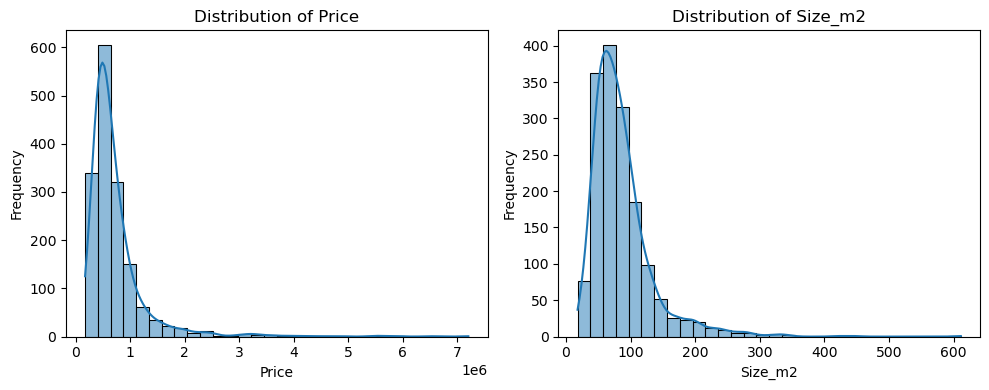

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))

columns_to_plot = ['Price', 'Size_m2']

for ax, col in zip(axes, columns_to_plot):
    sns.histplot(df[col], bins=30, kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Both variables exhibit right-skewness, which is common for variables like price and size in real estate.

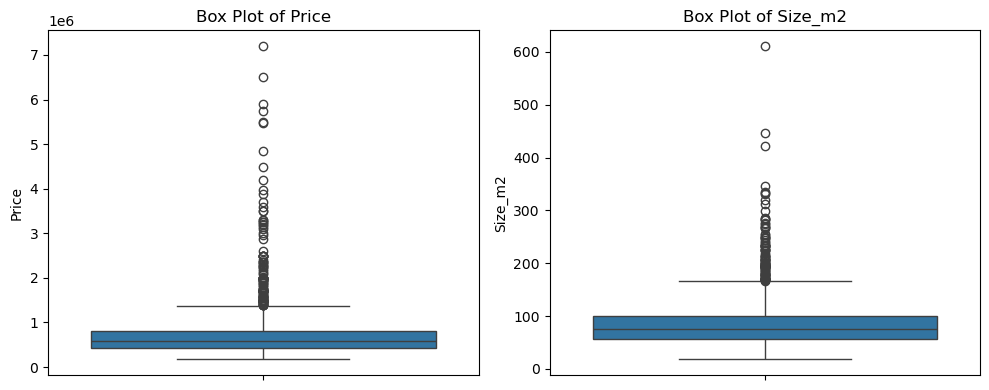

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))

columns_to_plot = ['Price', 'Size_m2']

for ax, col in zip(axes, columns_to_plot):
    sns.boxplot(y=df[col], ax=ax)  
    ax.set_title(f'Box Plot of {col}') 
    ax.set_ylabel(col)  #

plt.tight_layout()  
plt.show()  

Both variables (Price and Size_m2) contain a large number of outliers. These outliers are apartments with significantly higher prices and larger sizes, which deviate from the majority of the data.

In [29]:
# Exploring Categorical Variables
columns_to_count = ['Energy_Label', 'Floor_Level', 'Ownership_Status']

for column in columns_to_count:
    print(f"{column} Counts:\n{df[column].value_counts()}\n")

Energy_Label Counts:
Energy_Label
C          381
A          352
B          237
Unknown    214
D          209
E           90
A+          45
A++         26
F           21
G           15
A+++        10
Name: count, dtype: int64

Floor_Level Counts:
Floor_Level
3     359
2     352
1     282
0     274
4     187
5      43
6      32
7      18
8      15
12     10
9       8
11      4
10      3
14      3
21      3
16      2
19      2
13      1
15      1
18      1
Name: count, dtype: int64

Ownership_Status Counts:
Ownership_Status
Leasehold           721
Full ownership      670
Perpetual buyout    209
Name: count, dtype: int64



The data indicates a predominance of mid-range energy efficiency, lower-floor apartments, and leasehold agreements.

#### Preliminary Visualizations

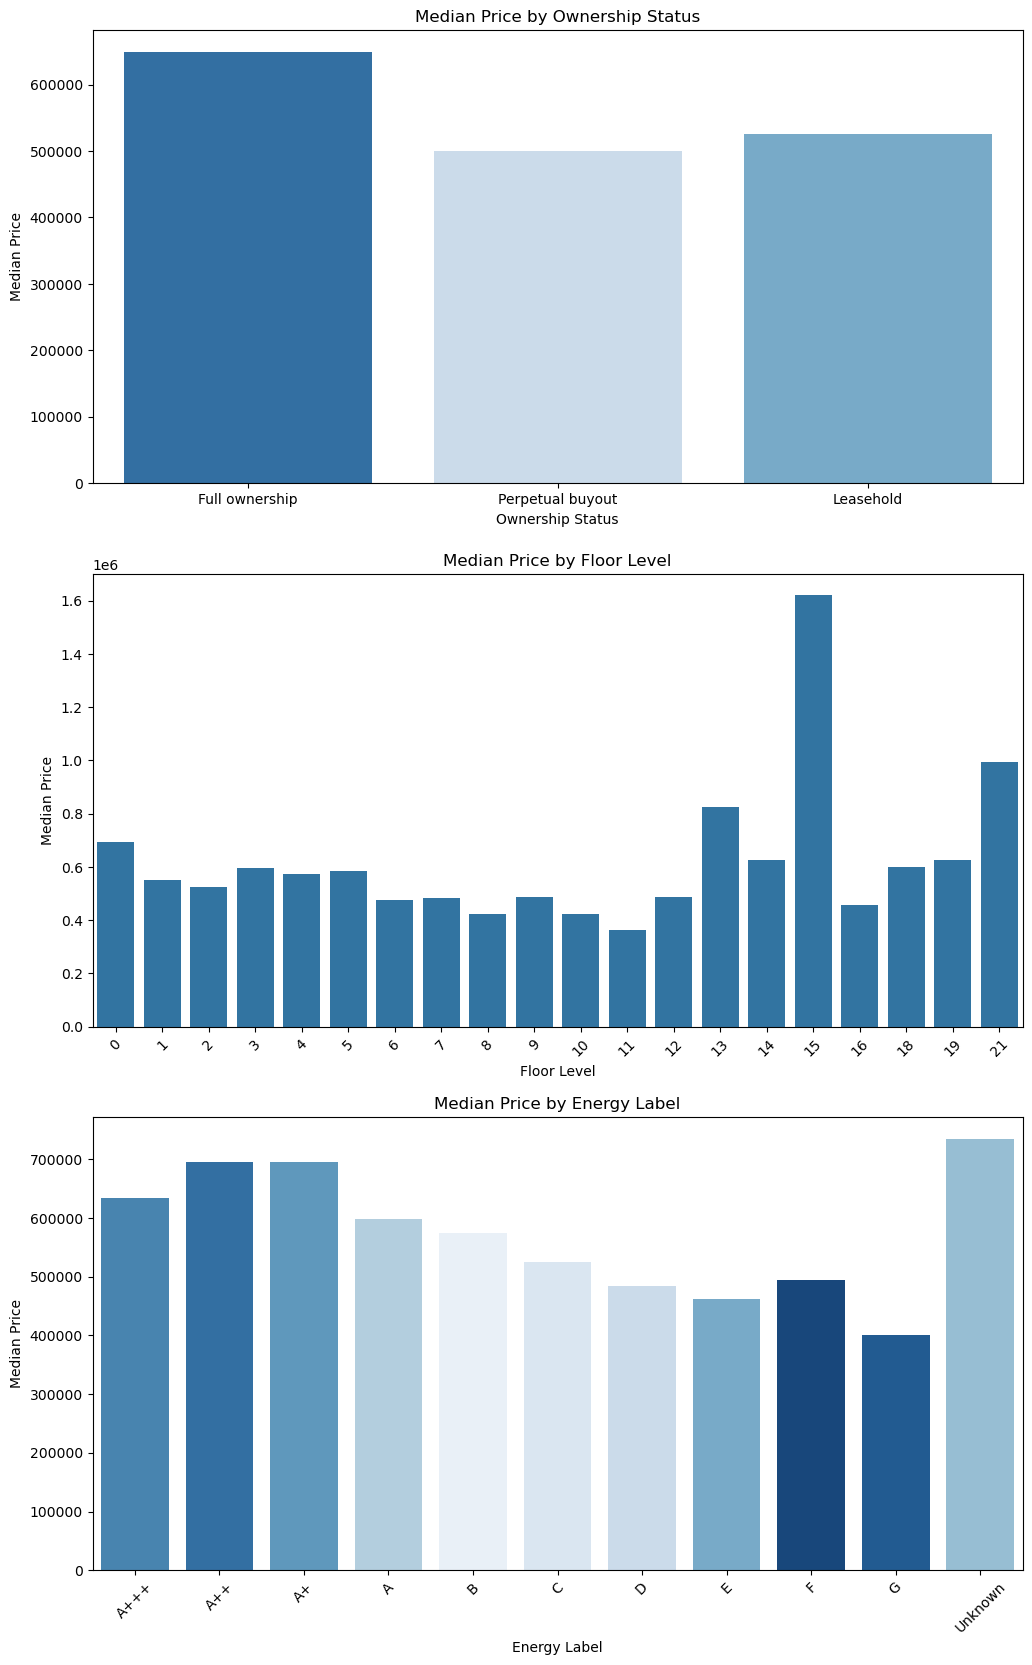

In [32]:
ownership_order = ['Full ownership', 'Perpetual buyout', 'Leasehold'] 
energy_label_order = ['A+++','A++','A+','A', 'B', 'C', 'D', 'E','F','G','Unknown'] 

plt.figure(figsize=(12,20))

# Ownership Status Median Price Plot
plt.subplot(3, 1, 1)  
sns.barplot(data=df, x='Ownership_Status', y='Price', estimator=np.median, errorbar=None, hue='Ownership_Status',palette='Blues', order=ownership_order)  
plt.title('Median Price by Ownership Status')
plt.xlabel('Ownership Status')
plt.ylabel('Median Price')

# Floor Level Median Price Plot
plt.subplot(3, 1, 2) 
sns.barplot(data=df, x='Floor_Level', y='Price', estimator=np.median, errorbar=None,legend=False)  
plt.title('Median Price by Floor Level')
plt.xlabel('Floor Level')
plt.ylabel('Median Price')
plt.xticks(rotation=45)

# Energy Label Median Price Plot
plt.subplot(3, 1, 3)  
sns.barplot(data=df, x='Energy_Label', y='Price', estimator=np.median, errorbar=None, hue='Energy_Label',palette='Blues', order=energy_label_order)  
plt.title('Median Price by Energy Label')
plt.xlabel('Energy Label')
plt.ylabel('Median Price')
plt.xticks(rotation=45)

plt.show()


Ownership status influences prices, with full ownership associated with the highest median prices.  
Floor level skews the perception of apartment prices, suggesting that higher floors are more expensive, which may not reflect the overall trend due to limited data on available apartments.   
Energy efficiency correlates with apartment value, as more efficient homes tend to be priced higher. However, the "unknown" category also holds high value, potentially due to other apartment features.

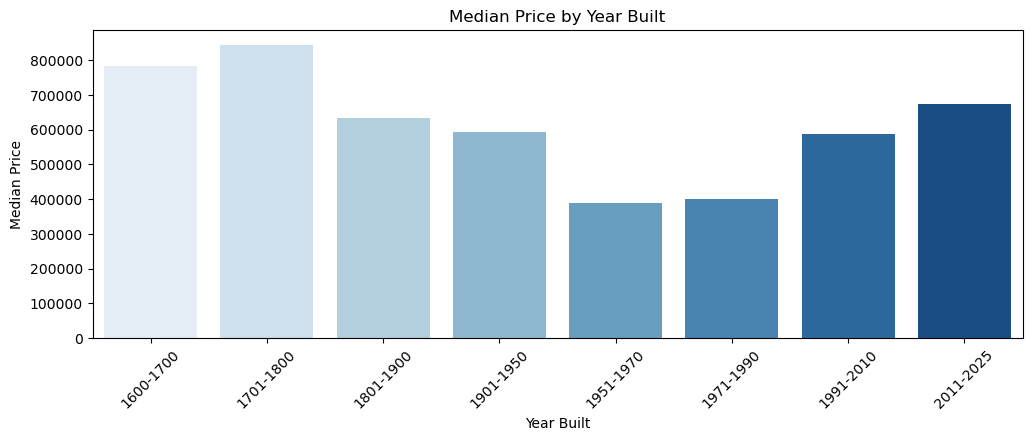

In [34]:
import warnings

bins = [1600, 1700, 1800, 1900, 1950, 1970, 1990, 2010, 2025]  
labels = ['1600-1700', '1701-1800', '1801-1900', '1901-1950', '1951-1970', '1971-1990', '1991-2010', '2011-2025']  

with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    
    binned_data = df.copy()  
    binned_data['Year_Built_Bin'] = pd.cut(binned_data['Year_Built'], bins=bins, labels=labels, right=True) 

    median_prices = binned_data.groupby('Year_Built_Bin')['Price'].median().reset_index()


# Median price by Year_Built
plt.figure(figsize=(12, 4))
sns.barplot(data=median_prices, x='Year_Built_Bin', y='Price', estimator=np.median, hue='Year_Built_Bin',palette='Blues', errorbar=None) 
plt.title('Median Price by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Median Price')
plt.xticks(rotation=45)
plt.show()

Older, historically significant apartments and newly constructed buildings seem to have a premium.

#### Filtering for IQR (25th - 75th Percentiles)


After inspecting the dataset, I identified significant outliers in the apartment price distribution that could skew the analysis. To create a more representative model, I filtered the dataset to focus on mid-range apartments priced between the 25th and 75th percentiles (the interquartile range, or IQR):  

- **Lower Bound**: 25th percentile of the price distribution  
- **Upper Bound**: 75th percentile of the price distribution

This decision to concentrate on mid-range apartments is justified, as they represent the most common market segment, helping us better understand transaction dynamics. By excluding high-priced luxury homes and low-priced apartments—often located in less desirable areas alongside compact units that command higher prices per square meter due to their prime locations—we reduce noise in our analysis.

This focus enhances comparability due to similar attributes, provides clearer insights into market trends, and yields findings that are more relevant to prospective buyers and sellers. Filtering out extreme values allows our analysis to concentrate on mid-range apartments that better reflect typical market conditions, resulting in a distribution closer to normal.


In [38]:
Q1 = df['Price'].quantile(0.25)  
Q3 = df['Price'].quantile(0.75)  

df_filtered = df[(df['Price'] >= Q1) & (df['Price'] <= Q3)].copy().reset_index(drop=True)

print("Original DataFrame:")
print(df.shape)
print("\nFiltered DataFrame (between Q1 and Q3):")
print(df_filtered.shape)

Original DataFrame:
(1600, 9)

Filtered DataFrame (between Q1 and Q3):
(860, 9)


---
  
## 6. Exploratory Data Analysis (EDA)

This section presents an exploratory analysis of the apartment price dataset, highlighting key insights into the factors influencing apartment values.

#### Summary of EDA Insights

The analysis reveals a wide price distribution with significant outliers (maximum price: 7,200,000). After filtering for the interquartile range (IQR), the dataset is reduced to 860 apartment entries, yielding a mean price of 575,050. This filtering enhances the reliability of the analysis by focusing on typical market conditions.

Key insights include:

- **Price Correlations**: Apartment prices are most strongly correlated with size (m²), as larger apartments generally command higher prices. Other factors, such as the number of rooms, neighborhood, energy efficiency, and floor levels, show weaker correlations with price.
- **Apartment Age**: The dataset primarily consists of newer constructions, limiting the representation of older apartments.
- **Energy Efficiency**: More energy-efficient homes typically have higher median prices; however, apartments with unknown labels show significant price variation.
- **Floor Levels**: Apartments on lower floors (0 to 9) exhibit more price variability, while higher prices for floors 12 to 19 should be interpreted cautiously due to limited data.

In [40]:
# Recalculate summary statistics for numerical variables
df_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,860.0,575049.722093,110084.546112,425000.0,475000.0,560000.0,650000.00,800000.0
Size_m2,860.0,73.245349,19.590845,36.0,57.0,70.0,85.00,153.0
Number_of_Rooms,860.0,3.052326,0.796270,1.0,3.0,3.0,3.00,7.0
Year_Built,860.0,1938.653488,59.090238,1618.0,1906.0,1931.5,1988.25,2024.0
Number_of_Bathrooms,860.0,1.033721,0.193076,1.0,1.0,1.0,1.00,3.0
Floor_Level,860.0,2.441860,2.221205,0.0,1.0,2.0,3.00,19.0
Neighborhood_Avg_Ask_Price_per_m2,860.0,7896.446512,1255.078680,4263.0,7456.0,8124.0,8786.00,10829.0


In [41]:
# Recalculate value counts for categorical variables
energy_label_counts = df_filtered['Energy_Label'].value_counts()
floor_level_counts = df_filtered['Floor_Level'].value_counts()
ownership_status_counts = df_filtered['Ownership_Status'].value_counts()

print("\nEnergy Label Counts:")
print(energy_label_counts)

print("\nFloor Level Counts:")
print(floor_level_counts)

print("\nOwnership Status Counts:")
print(ownership_status_counts)


Energy Label Counts:
Energy_Label
C          204
A          197
B          136
D          124
Unknown     94
E           47
A+          25
A++         13
F           10
G            5
A+++         5
Name: count, dtype: int64

Floor Level Counts:
Floor_Level
2     200
3     192
1     150
0     138
4     106
5      29
6      14
7       8
8       6
9       5
12      3
16      2
14      2
19      2
10      2
18      1
Name: count, dtype: int64

Ownership Status Counts:
Ownership_Status
Leasehold           393
Full ownership      348
Perpetual buyout    119
Name: count, dtype: int64


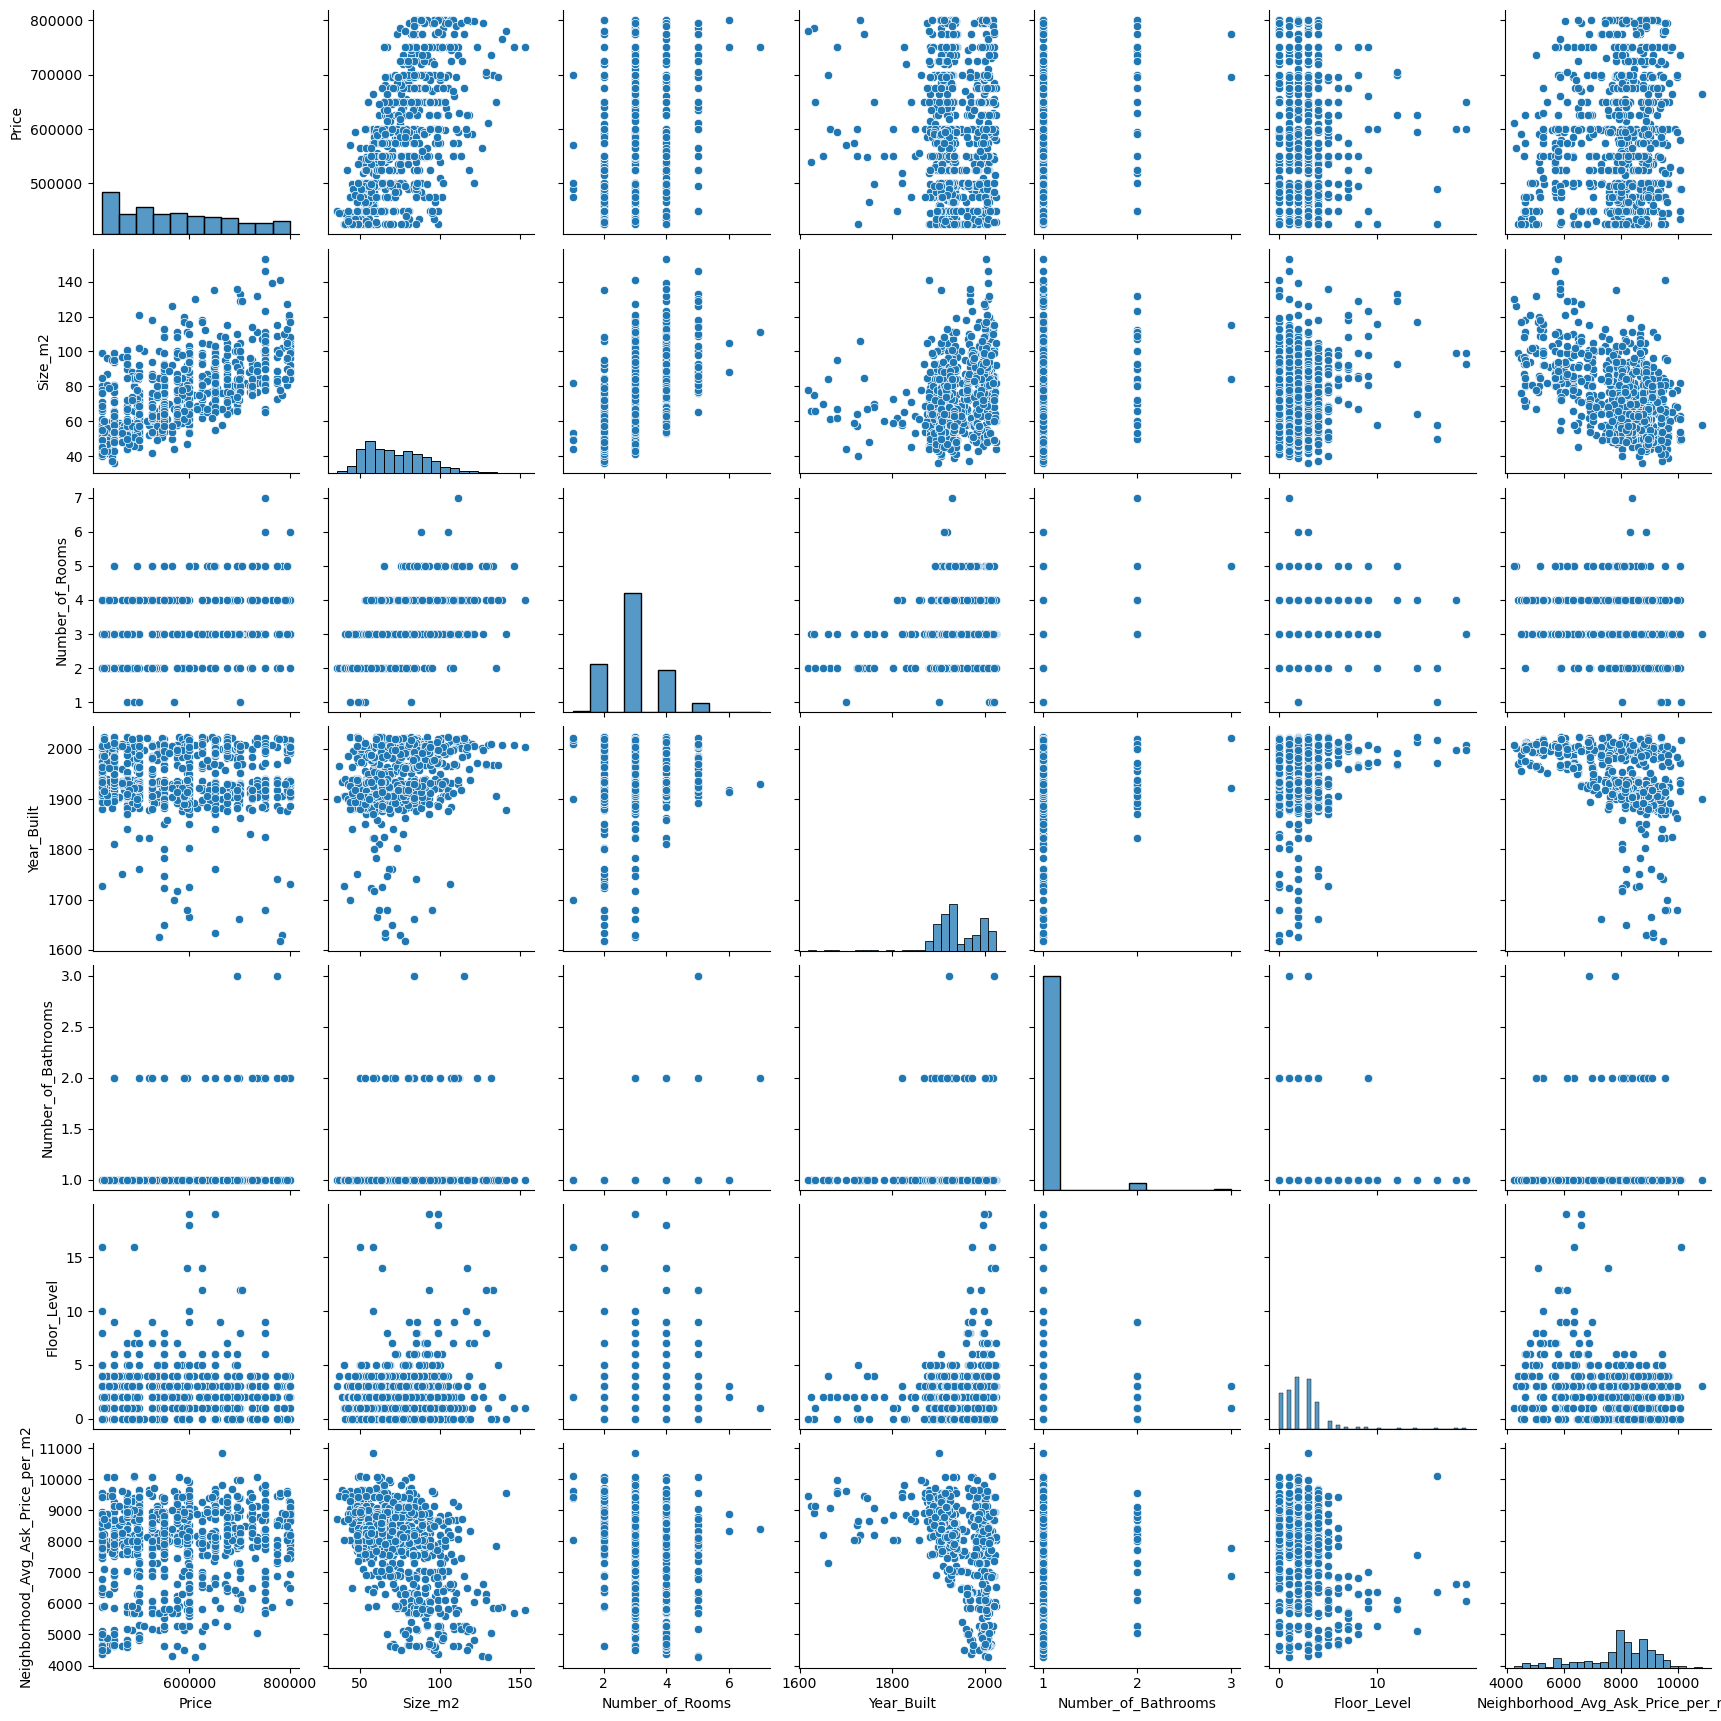

In [42]:
# Exploratory Pairplot: Relationships and Distributions

sns.pairplot(df_filtered)
plt.show()

The pairplot reveals a clear relationship between Price and Size (m²), with larger apartments typically having higher prices. The relationship with Neighborhood Average Asking Price per m² is less pronounced.  
The histogram for Year Built shows that the dataset is predominantly composed of newer constructions, with fewer older apartments.

#### Advanced Data Visualizations

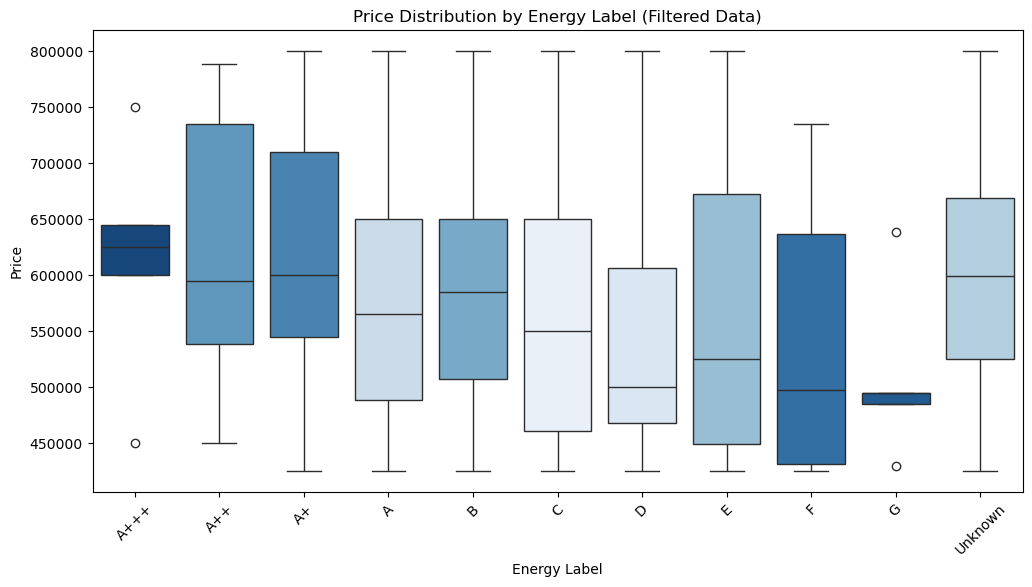

In [45]:
# Box plot for Price by Energy_Label in df_filtered
plt.figure(figsize=(12, 6))
sns.boxplot(x='Energy_Label', y='Price', data=df_filtered, hue='Energy_Label',palette='Blues', order=energy_label_order)
plt.title('Price Distribution by Energy Label (Filtered Data)')
plt.xlabel('Energy Label')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

The more energy-efficient homes generally commanding higher median prices.
Apartments with Unknown labels display a wide range of prices, which could indicate a mix of both energy-efficient and non-efficient apartments.

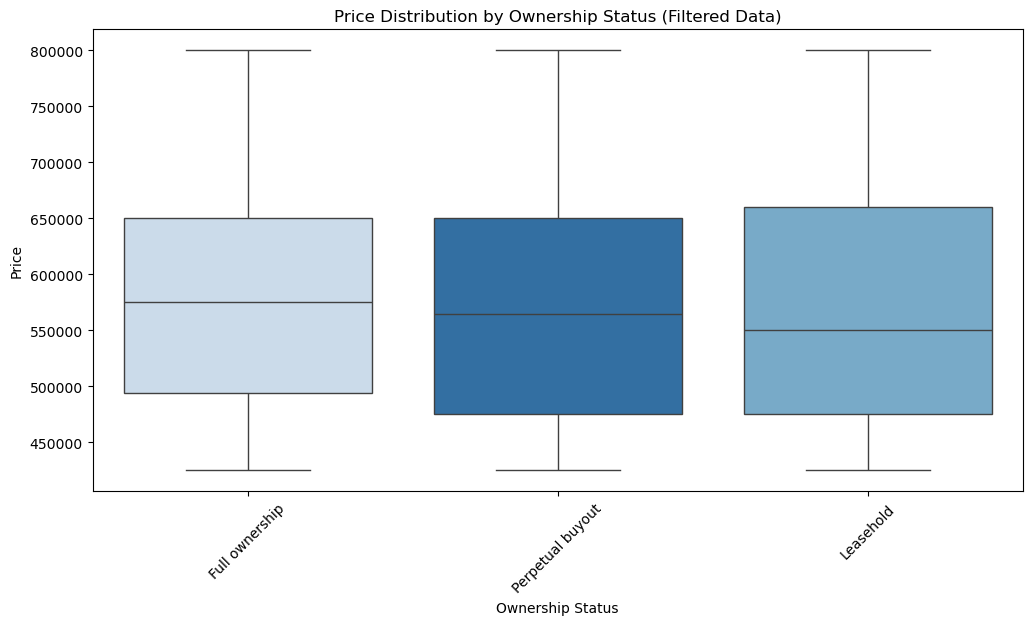

In [47]:
# Box plot for Price by Ownership_Status in df_filtered
plt.figure(figsize=(12, 6))
sns.boxplot(x='Ownership_Status', y='Price', data=df_filtered, hue='Ownership_Status',palette='Blues', order=ownership_order)
plt.title('Price Distribution by Ownership Status (Filtered Data)')
plt.xlabel('Ownership Status')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

 There may be some variation in price based on ownership status, it is not a strong factor influencing apartment prices in this dataset.

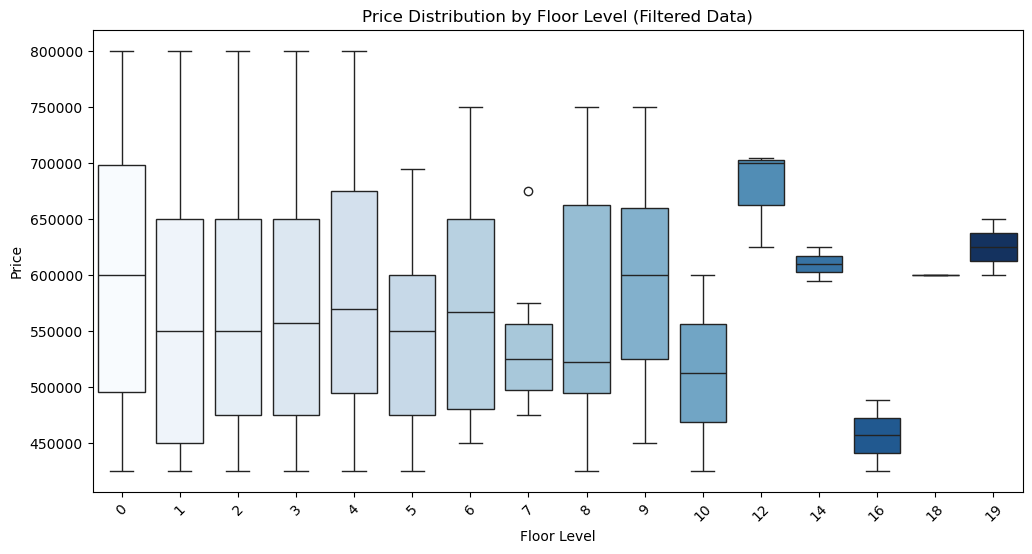

In [49]:
# Box plot for Price by Floor_Level in df_filtered
plt.figure(figsize=(12, 6))
sns.boxplot(x='Floor_Level', y='Price', data=df_filtered,  hue='Floor_Level',palette='Blues',legend=False)
plt.title('Price Distribution by Floor Level (Filtered Data)')
plt.xlabel('Floor Level')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

Floors closer to the ground (0 to 9) exhibit more variability in prices, which could reflect differences in apartment size, condition, or other factors not directly related to floor level.
The observed higher prices on floors 12 to 19 should be interpreted cautiously due to the limited data points.

### Encoding Categorical Variables

In [52]:
ownership_order = ['Full ownership', 'Perpetual buyout', 'Leasehold']
ordinal_encoder = OrdinalEncoder(categories=[ownership_order])
df_filtered['Ownership_Status'] = ordinal_encoder.fit_transform(df_filtered[['Ownership_Status']])


energy_mapping = {'A+++': 1,
                  'A++': 2,
                  'A+': 3,
                  'A': 4,
                  'B': 5,
                  'C': 6,
                  'D': 7,
                  'E': 8,
                  'F': 9,
                  'G': 10,
                  'Unknown': 0}
df_filtered['Energy_Label'] = df_filtered['Energy_Label'].replace(energy_mapping)
df_filtered.head()

,Price,Size_m2,Number_of_Rooms,Year_Built,Number_of_Bathrooms,Energy_Label,Floor_Level,Neighborhood_Avg_Ask_Price_per_m2,Ownership_Status
0,475000,57,3,1933.0,1.0,6,2,8146.0,0.0
1,450000,52,3,1929.0,1.0,7,3,8380.0,0.0
2,465000,54,2,1929.0,1.0,4,4,8146.0,0.0
3,550000,62,3,1935.0,1.0,7,1,8380.0,0.0
4,650000,66,3,1931.0,1.0,4,2,8890.0,2.0


### Correlation Analysis

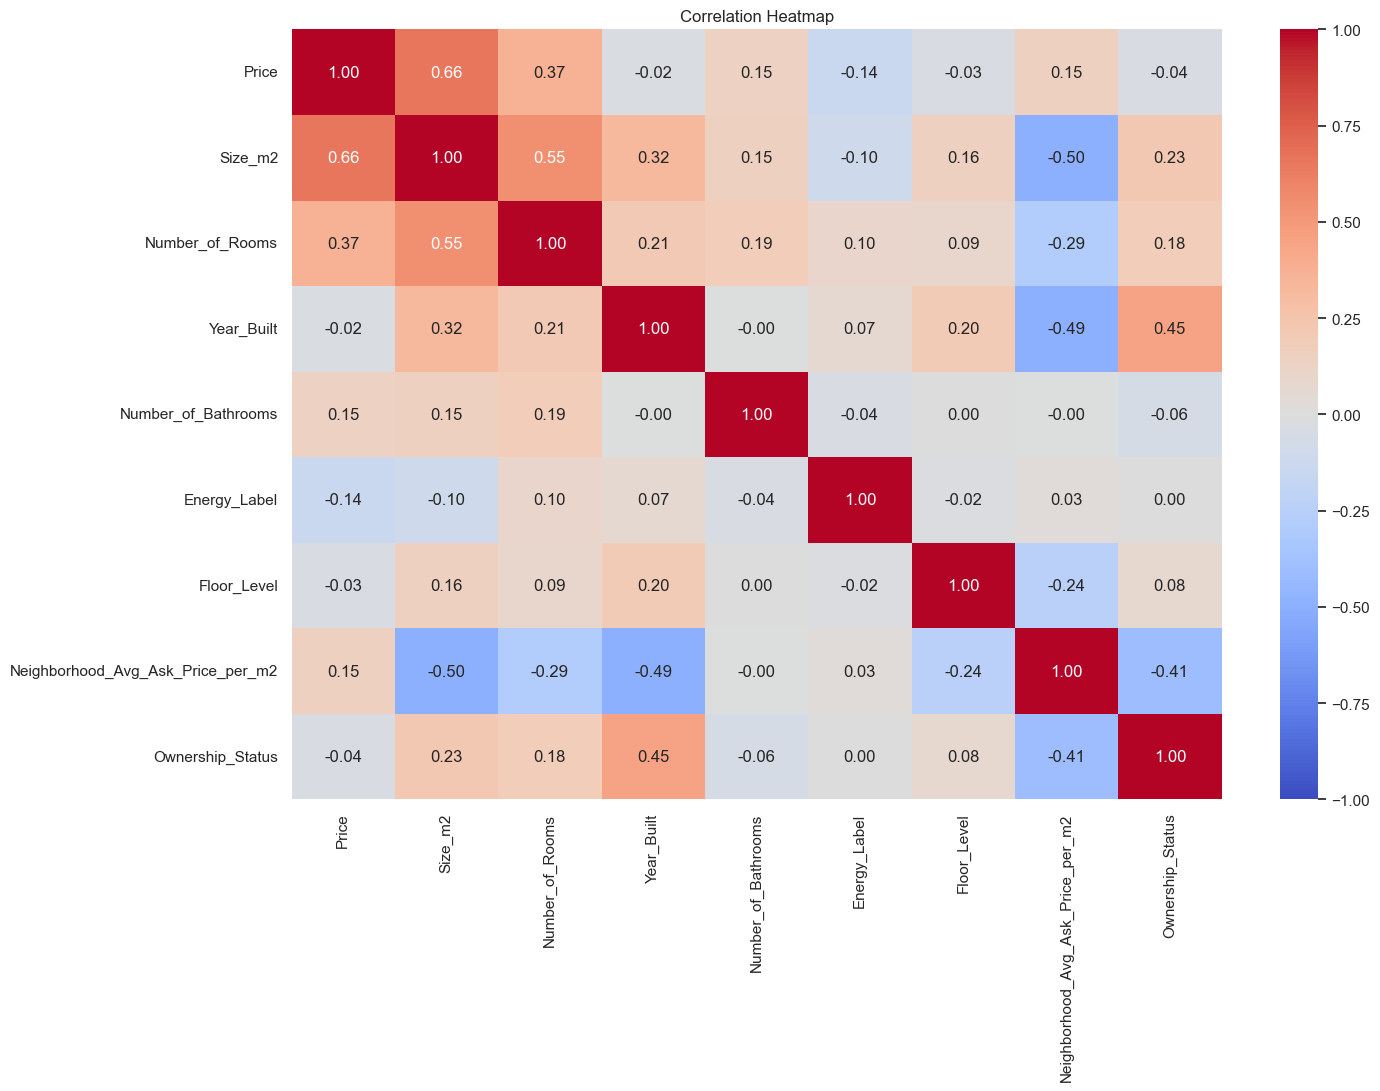

In [54]:
correlation_matrix = df_filtered.corr()
plt.figure(figsize=(15, 10))  
sns.set(font_scale=1)  
sns.heatmap(correlation_matrix, vmin=-1, annot=True, fmt=".2f", cmap='coolwarm')  

plt.title('Correlation Heatmap')
plt.show()

The correlation matrix shows that size (m²) is the key factor influencing apartment prices.

---

## 7. Feature Exploration and Model Preparation

#### Train-Test Split

In [58]:
X = df_filtered.drop('Price', axis=1)  
y = df_filtered['Price']               

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Standardize Features

Standardizing the features ensures they are on the same scale, improving the model's convergence and interpretability of coefficients.

In [60]:
feature_names = X_train.columns  
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)        

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_names)

##### Feature Selection

In [62]:
# SelectKBest
selector = SelectKBest(score_func=f_regression, k='all') 

selector.fit(X_train_scaled, y_train)

scores = selector.scores_
p_values = selector.pvalues_

results_df = pd.DataFrame({'Feature': X.columns, 'Score': scores, 'P-Value': p_values})

results_df = results_df.sort_values(by='Score', ascending=False)

print("Feature Rankings Based on SelectKBest:")
print(results_df)

Feature Rankings Based on SelectKBest:
                             Feature       Score       P-Value
0                            Size_m2  522.872756  1.851045e-86
1                    Number_of_Rooms  125.704257  6.621899e-27
6  Neighborhood_Avg_Ask_Price_per_m2   17.375393  3.460434e-05
3                Number_of_Bathrooms   14.906635  1.236453e-04
4                       Energy_Label   14.320665  1.676412e-04
7                   Ownership_Status    0.829513  3.627332e-01
5                        Floor_Level    0.434005  5.102512e-01
2                         Year_Built    0.376233  5.398295e-01


The feature rankings based on the SelectKBest method reveal which predictors are most relevant for predicting apartment prices, with Size_m2, Number_of_Rooms, Neighborhood_Avg_Ask_Price_per_m2, Number_of_Bathrooms, and Energy_Label identified as the most significant factors, while Ownership_Status, Floor_Level, and Year_Built demonstrate little to no impact in this context.

In [64]:
# VIF
def calculate_vif(X):
    vif = pd.DataFrame()
    vif['Feature'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

vif_df = calculate_vif(X_train_scaled_df)

print("\nVariance Inflation Factor (VIF):")
print(vif_df.sort_values(by='VIF', ascending=False))


Variance Inflation Factor (VIF):
                             Feature       VIF
0                            Size_m2  1.859436
6                        Floor_Level  1.750462
1                    Number_of_Rooms  1.512377
2  Neighborhood_Avg_Ask_Price_per_m2  1.504733
7                         Year_Built  1.389101
5                   Ownership_Status  1.085661
4                       Energy_Label  1.064382
3                Number_of_Bathrooms  1.042514


Overall, the Variance Inflation Factor (VIF) values for all features in the dataset remain well below the critical threshold of 5. This suggests that multicollinearity does not pose a significant issue for the regression analysis conducted.

---

## 8. Model Building Using OLS Regression


In [67]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

y_train = y_train.reset_index(drop=True)
X_train_scaled_df = X_train_scaled_df.reset_index(drop=True)

X_train_scaled_df = sm.add_constant(X_train_scaled_df)

ols_model = sm.OLS(y_train, X_train_scaled_df).fit()

# Get robust covariance matrix with HC3 adjustment
robust_results = ols_model.get_robustcov_results(cov_type='HC3')

print(robust_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     146.6
Date:                Sat, 09 Nov 2024   Prob (F-statistic):          2.13e-142
Time:                        18:29:43   Log-Likelihood:                -8486.1
No. Observations:                 688   AIC:                         1.699e+04
Df Residuals:                     679   BIC:                         1.703e+04
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

The model explains a good portion of the variance in price (high R-squared).
Key variables, including Size_m2, Energy_Label, and Neighborhood_Avg_Ask_Price_per_m2, are highly significant.
In contrast, variables such as Year_Built, Number_of_Bathrooms, Floor_Level and Ownership_status are not statistically significant.  
Number_of_Rooms is marginally significant.

In [69]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

y_train = y_train.reset_index(drop=True)
X_train_scaled_df = X_train_scaled_df.reset_index(drop=True)

X_train_scaled_df = X_train_scaled_df.drop(columns=['Number_of_Bathrooms','Ownership_Status','Year_Built','Floor_Level'])

X_train_scaled_df = sm.add_constant(X_train_scaled_df)

ols_model_2 = sm.OLS(y_train, X_train_scaled_df).fit()

# Get robust covariance matrix with HC3 adjustment for the second model
robust_results_2 = ols_model_2.get_robustcov_results(cov_type='HC3')

print(robust_results_2.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     293.8
Date:                Sat, 09 Nov 2024   Prob (F-statistic):          7.80e-147
Time:                        18:29:43   Log-Likelihood:                -8488.7
No. Observations:                 688   AIC:                         1.699e+04
Df Residuals:                     683   BIC:                         1.701e+04
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

The removal of insignificant variables, did not cause a significant change in explanatory power, making the second model a more efficient and preferable option for interpretation and prediction.

---

## 9. Model Evaluation

#### Metrics

In [73]:
y_train_pred = ols_model_2.predict(X_train_scaled_df)

mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)

print("\nTraining Set Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.2f}")
print(f"R-squared: {r2_train:.2f}")

X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)
y_test = y_test.reset_index(drop=True)
X_test_scaled_df = X_test_scaled_df.reset_index(drop=True)
X_test_scaled_df = X_test_scaled_df.drop(columns=['Number_of_Bathrooms', 'Ownership_Status', 'Year_Built', 'Floor_Level'])
X_test_scaled_df = sm.add_constant(X_test_scaled_df)
y_test_pred = ols_model_2.predict(X_test_scaled_df)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)  
r2_test = r2_score(y_test, y_test_pred)

print("\nTest Set Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared: {r2_test:.2f}")


Training Set Performance Metrics:
Mean Absolute Error (MAE): 43798.80
Mean Squared Error (MSE): 3050688420.49
Root Mean Squared Error (RMSE): 55233.04
R-squared: 0.75

Test Set Performance Metrics:
Mean Absolute Error (MAE): 46232.03
Mean Squared Error (MSE): 3289660095.22
Root Mean Squared Error (RMSE): 57355.56
R-squared: 0.72


The model demonstrates strong performance, with an R-squared value of 0.75 on the training set and 0.72 on the test set, indicating that it explains a significant portion of the variance in both datasets. The error metrics (MAE, MSE, RMSE) show a small difference between the training and test sets, which is typical and suggests good generalization. While the model performs well, there are opportunities for further refinement to enhance predictive accuracy and robustness.

#### Residual Analysis

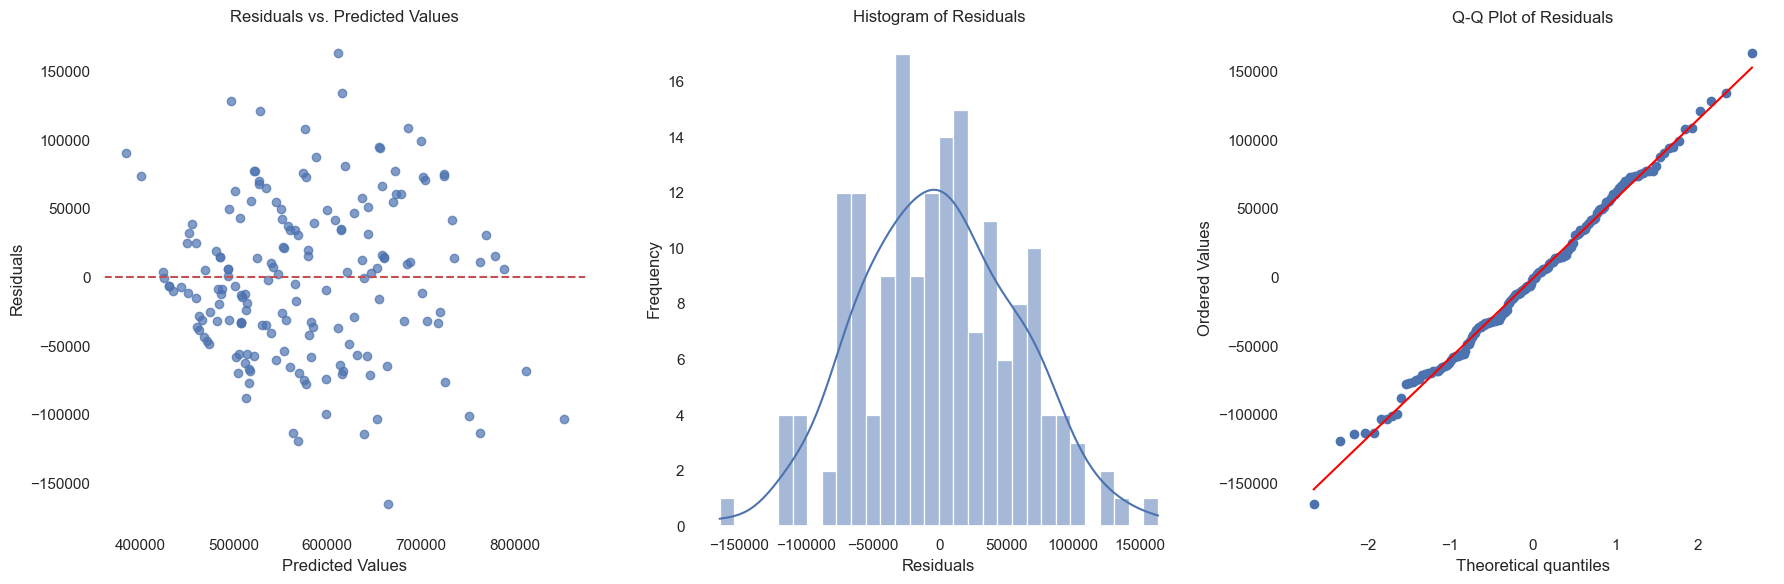

In [76]:
residuals_test = y_test - y_test_pred

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Subplot 1: Residuals vs. Predicted Values
axs[0].scatter(y_test_pred, residuals_test, alpha=0.7)
axs[0].axhline(y=0, color='r', linestyle='--')
axs[0].set_title('Residuals vs. Predicted Values')
axs[0].set_xlabel('Predicted Values')
axs[0].set_ylabel('Residuals')
axs[0].set_facecolor('white')

# Subplot 2: Histogram of Residuals
sns.histplot(residuals_test, kde=True, bins=30,  ax=axs[1])
axs[1].set_title('Histogram of Residuals')
axs[1].set_xlabel('Residuals')
axs[1].set_ylabel('Frequency')
axs[1].set_facecolor('white')

# Subplot 3: Q-Q Plot
stats.probplot(residuals_test, dist="norm", plot=axs[2])
axs[2].get_lines()[1].set_color('red')  # Change the line color to red
axs[2].set_title('Q-Q Plot of Residuals')
axs[2].set_facecolor('white')

plt.tight_layout()
plt.show()

The residuals appear reasonably normally distributed with constant variance, showing no obvious patterns in the residual vs. predicted values plot and are centered around zero, indicating a good fit. However, there is a presence of outliers and potential deviations from normality at the extremes, as observed in the Q-Q plot and histogram. These outliers might impact predictive performance and could warrant further investigation, such as transformations or robust regression techniques.


#### Visualization of Predictions

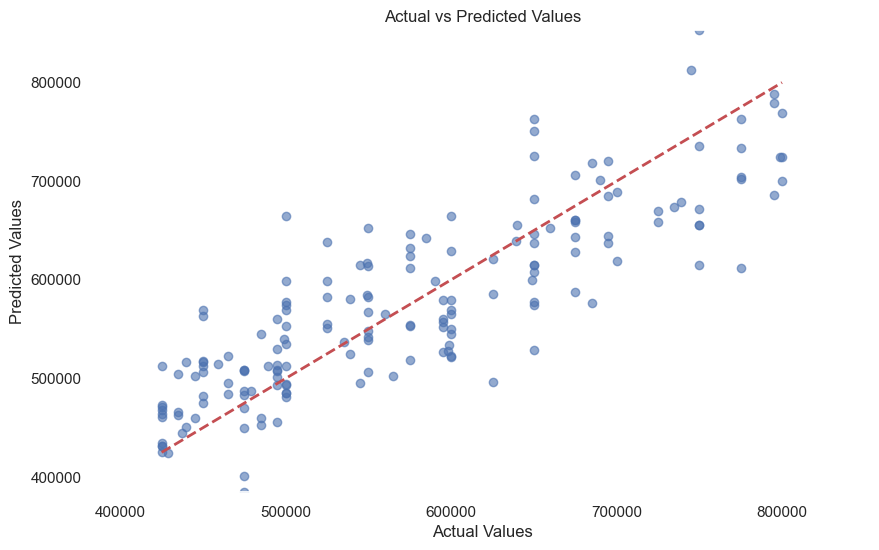

In [79]:
#Scatter Plot of Actual and Predicted Values

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(), y_test_pred.max())
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.gca().set_facecolor('white')
plt.show()

The model captures the trend well, with most predictions closely following the actual values. However, the variability suggests that some improvements could still be made.


#### Model Coefficient Interpretation: Standardized vs. Non-Standardized

In this section, we analyze the coefficients obtained from the Ordinary Least Squares (OLS) regression model. We will compare non-standardized and standardized coefficients to understand their impacts on apartment prices.


In [82]:
#Non-standardized Coefficients

selected_vars = ['Size_m2', 'Number_of_Rooms', 'Energy_Label', 'Neighborhood_Avg_Ask_Price_per_m2'] 
X_train_selected = X_train[selected_vars]
y_train = y_train.reset_index(drop=True)  
X_train_selected = sm.add_constant(X_train_selected.reset_index(drop=True))  
ols_model_3 = sm.OLS(y_train, X_train_selected).fit()
ols_coefficients = ols_model_3.params
print("Non-standardized OLS Coefficients for ols_model_3:")
print(ols_coefficients)
print()

Non-standardized OLS Coefficients for ols_model_3:
const                               -256041.778894
Size_m2                                5244.874622
Number_of_Rooms                        7969.541610
Energy_Label                          -3550.944436
Neighborhood_Avg_Ask_Price_per_m2        55.723210
dtype: float64



##### Non-Standardized Model Coefficients   
  
The table below presents the non-standardized coefficients, which indicate the expected price changes associated with unit increases in each predictor variable. These coefficients provide direct insights into how individual features influence apartment prices.

| Feature                                 | Coefficient    | Interpretation                                                           |
|-----------------------------------------|----------------|-------------------------------------------------------------------------|
| Constant                                | -258,869.57    | Represents the expected price when all predictors are zero; not realistic in this context.           |
| Size_m2                                | 5,256.38       | For each additional square meter, the price increases by 5,256.38 euros. |
| Number_of_Rooms                        | 7,739.54       | For each additional room, the price increases by 7,739.54 euros.      |
| Energy_Label                            | -2,889.95      | For each increase in the energy label (from A+++ to G), the price decreases by 2,889.95 euros, reflecting that apartments with higher energy efficiency (lower label values) hold greater value. |
| Neighborhood_Avg_Ask_Price_per_m2     | 55.62          | For each additional euro increase in neighborhood average asking price per m², the price increases by 55.62 euros. |

---

    
##### Standardized Model Coefficients
    
The table below presents the standardized coefficients, which indicate the effect of one standard deviation change in each feature. Standardized coefficients allow for the ranking of predictors by their relative importance.

| Feature                                 | Coefficient    | Interpretation                                                           |
|-----------------------------------------|----------------|-------------------------------------------------------------------------|
| Constant                                | 575,100.00     | Expected price when all predictors are at their mean values.           |
| Size_m2                                | 103,800.00     | For a one standard deviation increase in size, the price increases by 103,800 euros. |
| Number_of_Rooms                        | 6,145.46       | For a one standard deviation increase in the number of rooms, the price increases by 6,145.46 euros. |
| Energy_Label                            | -7,234.53      | For a one standard deviation increase in the energy label (from A+++ to poorer labels), the price decreases by 7,234.53 euros, indicating the negative impact of lower energy efficiency on apartment value. |
| Neighborhood_Avg_Ask_Price_per_m2     | 70,720.00      | For a one standard deviation increase in neighborhood average asking price per m², the price increases by 70,720 euros. |

---

In summary the coefficients illustrate the direct effects of various features on apartment prices. Non-standardized coefficients show the expected price changes for unit increases, while standardized coefficients enable comparison of relative importance, with size and neighborhood average asking price identified as the most significant factors influencing apartment values.



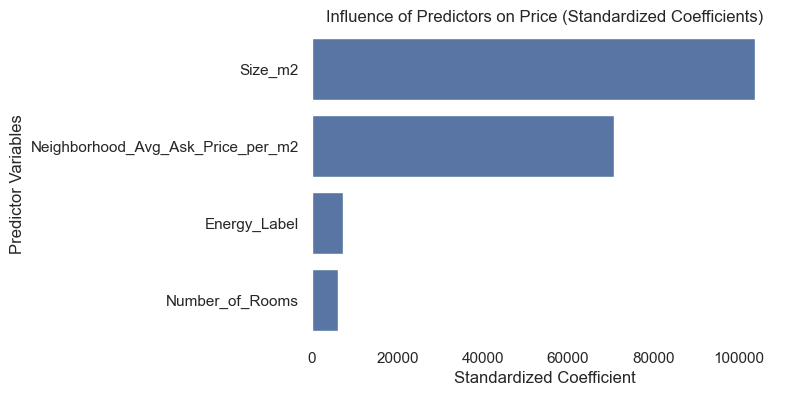

In [84]:
# Relative impact of key features on apartment prices using standardized coefficients

features = ['Size_m2', 'Neighborhood_Avg_Ask_Price_per_m2', 'Number_of_Rooms', 'Energy_Label']
standardized_coefficients = [103800.00, 70720.00, 6145.46, -7234.53]

coef_df = pd.DataFrame({'Feature': features, 'Standardized Coefficient': standardized_coefficients})
coef_df['abs_coef'] = coef_df['Standardized Coefficient'].abs()
coef_df = coef_df.sort_values('abs_coef', ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x='abs_coef', y='Feature', data=coef_df)
plt.title('Influence of Predictors on Price (Standardized Coefficients)')
plt.xlabel('Standardized Coefficient')
plt.ylabel('Predictor Variables')
plt.gca().set_facecolor('white')
plt.show()

---

## 10. Insights and Future Considerations

This analysis offers a detailed perspective on Amsterdam's apartment market, revealing that **size** and **neighborhood-specific price averages** are the primary determinants of apartment prices. Secondary factors like **energy efficiency** and **the number of rooms** also exhibit notable but lesser influence, especially for mid-range apartments that are typically more representative of the overall market. These insights highlight the complexity of apartment pricing and demonstrate the potential for data-driven approaches to inform both buyers and sellers.

#### Key Insights

- **Size and Neighborhood Premiums**: Apartment size and the average price per square meter in the neighborhood are the strongest predictors of price, underscoring the significance of both intrinsic property characteristics and external locational factors.

- **Secondary Factors**: Energy efficiency ratings and the number of rooms contribute to pricing but are less impactful compared to size and location.

- **Impact of Outliers and Market Segmenting**: Excluding high-priced and low-priced outliers has refined the analysis, making it more representative of Amsterdam’s typical apartment market. This approach enhances insights into price drivers for the average buyer and suggests the need for separate analyses of luxury and affordable segments in future models.

- **Model Performance**: The final OLS regression model demonstrates strong predictive capability, achieving an R-squared value of **0.72** on the test set. This indicates that it explains 72% of the variance in apartment prices, highlighting its effectiveness in capturing market

#### Future Enhancements

1. **Expand Data Scope**: Extending the dataset to cover multiple months or even a full year could enhance the model’s robustness by capturing seasonal and economic variations. Additionally, incorporating a broader range of property features—such as view, proximity to amenities, and recent renovations—could provide more granular insights into the factors influencing apartment prices.

2. **Regularization Techniques**: Techniques such as Ridge or Lasso regression could be applied to address potential multicollinearity, improving predictive accuracy. This would help refine the model by reducing redundancy and enhancing the interpretability of each variable’s effect on price.

3. **Modeling Alternatives and Robust Regression**: Investigating alternative methods like Random Forests or Gradient Boosting could offer more flexible and potentially more accurate predictions by capturing non-linear relationships in the data. Additionally, robust regression methods may better handle outliers, ensuring that high-leverage points do not unduly influence results.

4. **Predictive Insights for Broader Applications**: Developing a lightweight, interactive dashboard or tool could make these findings more accessible to users interested in market trends and price estimations. This interface could allow users to test hypothetical scenarios, facilitating data-driven insights for potential buyers, sellers, or analysts looking to understand Amsterdam's apartment market dynamics. trends.
